In [3]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (8, 8)

tf.__version__

'2.12.0'

In [5]:
borrower_features = np.array([[2., 2., 43.]], np.float32)

In [6]:
# Initialize bias1
bias1 = tf.Variable(1.0, tf.float32)

# Initialize weights1 as 3x2 variable of ones
weights1 = tf.Variable(tf.ones((3, 2)))

# Perform matrix multiplication of borrower_features and weights1
product1 = tf.matmul(borrower_features, weights1)

# Apply sigmoid activation function to product1 + bias1
dense1 = tf.keras.activations.sigmoid(product1 + bias1)

# Print shape of dense1
print("dense1's output shape: {}".format(dense1.shape))

dense1's output shape: (1, 2)


In [7]:
# Initialize bias2 and weights2
bias2 = tf.Variable(1.0)
weights2 = tf.Variable(tf.ones((2, 1)))

# Perform matrix multiplication of dense1 and weights2
product2 = tf.matmul(dense1, weights2)

# Apply activation to product2 + bias2 and print the prediction
prediction = tf.keras.activations.sigmoid(product2 + bias2)
print('prediction: {}'.format(prediction.numpy()[0, 0]))
print('\n actual: 1')

prediction: 0.9525741338729858

 actual: 1


In [8]:
bias1 = tf.Variable([0.1], tf.float32)

# Compute the product of borrower_features and weights1
products1 = tf.matmul(borrower_features, weights1)

# Apply a sigmoid activation function to products1 + bias1
dense1 = tf.keras.activations.sigmoid(products1 + bias1)

# Print the shapes of borrower_features, weights1, bias1, and dense1
print('\n shape of borrower_features: ', borrower_features.shape)
print('\n shape of weights1: ', weights1.shape)
print('\n shape of bias1: ', bias1.shape)
print('\n shape of dense1: ', dense1.shape)


 shape of borrower_features:  (1, 3)

 shape of weights1:  (3, 2)

 shape of bias1:  (1,)

 shape of dense1:  (1, 2)


In [9]:
df = pd.read_csv("uci_credit_card.csv")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [10]:
features = df.columns[1:11].tolist()
borrower_features = df[features].values
borrower_features = tf.convert_to_tensor(borrower_features, np.float32)
idx = tf.constant(list(range(0,100)))
borrower_features = tf.gather(borrower_features, idx)

In [11]:
# Define the first dense layer
dense1 = tf.keras.layers.Dense(7, activation='sigmoid')(borrower_features)

# Define a dense layer with 3 output nodes
dense2 = tf.keras.layers.Dense(3, activation='sigmoid')(dense1)

# Define a dense layer with 1 output node
predictions = tf.keras.layers.Dense(1, activation='sigmoid')(dense2)

# Print the shapes of dense1, dense2, and predictions
print('\n shape of dense1: ', dense1.shape)
print('\n shape of dense2: ', dense2.shape)
print('\n shape of predictions: ', predictions.shape)


 shape of dense1:  (100, 7)

 shape of dense2:  (100, 3)

 shape of predictions:  (100, 1)


In [12]:
bill_amounts = df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3']].to_numpy()
default = df[['default.payment.next.month']].to_numpy()

In [13]:
# Construct input layer from features
inputs = tf.constant(bill_amounts, tf.float32)

# Define first dense layer
dense1 = tf.keras.layers.Dense(3, activation='relu')(inputs)

# Define second dense layer
dense2 = tf.keras.layers.Dense(2, activation='relu')(dense1)

# Define output layer
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(dense2)

# Print error for first five examples
error = default[:5] - outputs.numpy()[:5]
print(error)

[[ 0.5]
 [ 1. ]
 [ 0. ]
 [-0.5]
 [ 0. ]]


In [14]:
features = df.columns[1:11].tolist()
borrower_features = df[features].values

In [15]:
# Construct input layer from borrower features
inputs = tf.constant(borrower_features, tf.float32)

# Define first dense layer
dense1 = tf.keras.layers.Dense(10, activation='sigmoid')(inputs)

# Define second dense layer
dense2 = tf.keras.layers.Dense(8, activation='relu')(dense1)

# Define output layer
outputs = tf.keras.layers.Dense(6, activation='softmax')(dense2)

# Print first five predictions
print(outputs.numpy()[:3])

[[0.14348438 0.1482747  0.1324966  0.22490548 0.19483761 0.15600125]
 [0.14348438 0.1482747  0.1324966  0.22490548 0.19483761 0.15600125]
 [0.14348438 0.1482747  0.1324966  0.22490548 0.19483761 0.15600125]]


In [81]:
import math
def loss_function(x):
    return 4.0 * math.cos(x - 1) + math.cos(2.0 * math.pi * x) / x

In [82]:
# Initialize x_1 and x_2
x_1 = tf.Variable(6.0, tf.float32)
x_2 = tf.Variable(0.3, tf.float32)

# Define the optimization operation
opt = tf.keras.optimizers.SGD(learning_rate=0.01)

opt.build([x_1, x_2])

for j in range(100):
    # Perform minimization using the loss function and x_1
    opt.minimize(lambda: loss_function(x_1), var_list=[x_1])
    
    # Perform minimization using the loss function and x_2
    opt.minimize(lambda: loss_function(x_2), var_list=[x_2])

# Print x_1 and x_2 as numpy arrays
print(x_1.numpy(), x_2.numpy())

6.027515 0.25


In [83]:
# Initialize x_1 and x_2
x_1 = tf.Variable(0.05, tf.float32)
x_2 = tf.Variable(0.05, tf.float32)

# Define the optimization operation for opt_1 and opt_2
opt_1 = tf.keras.optimizers.RMSprop(learning_rate=0.01, momentum=0.99)
opt_2 = tf.keras.optimizers.RMSprop(learning_rate=0.01, momentum=0.00)

for j in range(100):
    opt_1.minimize(lambda: loss_function(x_1), var_list=[x_1])
    # Define the minimization operation for opt_2
    opt_2.minimize(lambda: loss_function(x_2), var_list=[x_2])
    
# Print x_1 and x_2 as numpy arrays
print(x_1.numpy(), x_2.numpy())

2.744512 0.24999999


In [84]:
# Define the layer 1 weights
w1 = tf.Variable(tf.random.normal([23, 7]), tf.float32)

# Initialize the layer 1 bias
b1 = tf.Variable(tf.ones([7]), tf.float32)

# Define the layer 2 weights
w2 = tf.Variable(tf.random.normal([7, 1]), tf.float32)

# Define the layer 2 bias
b2 = tf.Variable(0.0, tf.float32)

In [85]:
from sklearn.model_selection import train_test_split
df.head()

X = df.iloc[:3000 ,1:24].astype(np.float32).to_numpy()
y = df.iloc[:3000, 24].astype(np.float32).to_numpy()

In [86]:
y

array([1., 1., 0., ..., 0., 1., 0.], dtype=float32)

In [101]:
borrower_features, test_features, borrower_targets, test_targets = train_test_split(X, y, test_size=0.25, stratify=y)

In [102]:
# Define the model
def model(w1, b1, w2, b2, features=borrower_features):
    # Apply relu activation function to layer 1
    layer1 = tf.keras.activations.relu(tf.matmul(features, w1) + b1)
    
    # Apply Dropout
    dropout = tf.keras.layers.Dropout(0.25)(layer1)
    return tf.keras.activations.sigmoid(tf.matmul(dropout, w2) + b2)

# Define the loss function
def loss_function(w1, b1, w2, b2, features=borrower_features, targets = borrower_targets):
    predictions = model(w1, b1, w2, b2)
    
    # Pass targets and predictions to the cross entropy loss
    return tf.keras.losses.binary_crossentropy(targets, predictions)

In [103]:
opt = tf.keras.optimizers.Adam(learning_rate=0.1, beta_1=0.9, beta_2=0.999, amsgrad=False)

In [105]:
import numpy as np

logits = np.random.rand(2250, 1)
labels = np.random.rand(2250)

labels = np.reshape(labels, (-1, 1))

print(logits.shape)  # (2250, 1)
print(labels.shape)  # (2250, 1)

(2250, 1)
(2250, 1)


In [106]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Train the model
for j in range(1000):
    # Complete the optimizer
    opt.minimize(lambda: loss_function(w1, b1, w2, b2), var_list=[w1, b1, w2, b2])

# Make predictions with model
model_predictions = model(w1, b1, w2, b2, test_features)

# Flatten the predictions to have the same shape as test_targets
model_predictions = np.ravel(model_predictions)

# Construct the confusion matrix
confusion_matrix(test_targets, model_predictions)


ValueError: `logits` and `labels` must have the same shape, received ((2250, 1) vs (2250,)).

In [107]:
import seaborn as sns

def confusion_matrix_plot(default, model_predictions):
    df = pd.DataFrame(np.hstack([default, model_predictions.numpy() > 0.5]),
                      columns = ['Actual','Predicted'])
    confusion_matrix = pd.crosstab(df['Actual'], df['Predicted'], 
                                   rownames=['Actual'], colnames=['Predicted'])
    sns.heatmap(confusion_matrix, cmap="Greys", fmt="d", annot=True, cbar=False)

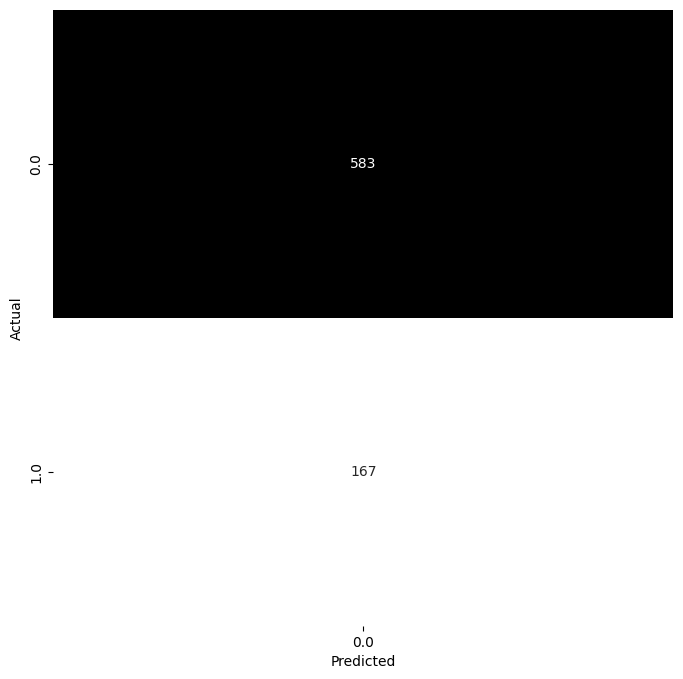

In [108]:
confusion_matrix_plot(test_targets.reshape(-1, 1), model_predictions)